# Final Project

## Outline:

This final project will consist of creating a simulation that should be able to simulate in small part the dispersion, and colonization of microbes in an uneven surface using simple rules.

## Table of Contents:


### Generating the environment.

#### Making a rock

Soil is an inconsistent medium, this means that generating it should come with a lot of ragged edges. Clays and sand particles are often deposited and shaped with layers, so we should end up with a result that is biased in layers.

To do this we need to simulate creation of layers and provide ample biases to get results that we would like.


First Let's make our imports:


In [1]:
from matplotlib import pyplot as plt
import numpy as np

Let's try generating one rock using this logic

In [2]:
def make_row(max_row_length,n_row):
    row = np.zeros(max_row_length)
    curr_col = 0
    while n_row > 0:
        if (max_row_length - curr_col) > n_row:
            if np.random.randint(0,10) > 7:
                row[curr_col] = 1
                n_row -=1
        else:
            # if theres still blocks to deposit, then deposit them
            if n_row > 0:
                row[curr_col:] = 1
                n_row -= (max_row_length - curr_col)
        curr_col += 1
    return row

For the biases in making a row, we want to encourage the placement of a block so we set a 70% chance of placing a block if it has blocks allotted to place in that row.
We get random shapes every time but with little structure

23 4


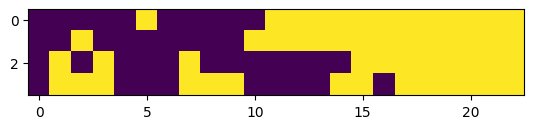

In [3]:
n_size = np.random.randint(30,50)
max_n_size = n_size
max_width = np.random.randint(2,max_n_size)
max_grid = np.zeros((n_size,n_size))
y_iter = 0

while n_size > 0: # blocks to allocate
    n_row = np.random.randint(1,max_width)
    #print("max_width, n_row", max_width, n_row)
    max_grid[y_iter][0:max_width] = make_row(max_width, n_row)

    n_size -= n_row
    y_iter += 1

new_rock = np.zeros((max_width,y_iter))
new_rock = max_grid[:y_iter,:max_width]
print(max_width, y_iter)
plt.imshow(new_rock)
plt.show()

Let's try again, this time having a bias for placing a block if a block had previously been placed, and try to get the layering effect:

In [4]:
def make_row(max_row_length, n_row, right_prob):
    '''
    Creates a row by assigning a row with 1s and 0s with influence from a right bias, which will return more dense structures
    '''
    row = np.zeros(max_row_length)
    curr_col = 0
    while n_row > 0:
        if (max_row_length - curr_col) > n_row:
            if row[0] == curr_col or row[curr_col-1] == 1:
                    if np.random.random() >= .1:
                        row[curr_col] = 1
                        n_row -=1
                    if curr_col > 2 and row[curr_col-2] == 1:
                        if np.random.random() >= .3:
                            row[curr_col] = 1
                            n_row -=1
                    if curr_col > 3 and row[curr_col-3] == 1:
                        if np.random.random() >= .4:
                            row[curr_col] = 1
                            n_row -=1
            
            #elif np.random.randint(0,10) > right_prob:
            #    row[curr_col] = 1
            #    n_row -=1
        else:
            # if theres still blocks to deposit, then deposit them
            if n_row > 0:
                row[curr_col:] = 1
                n_row -= (max_row_length - curr_col)
        curr_col += 1
    return row

In [5]:
def make_rock(n_size=np.random.randint(30,50) , min_width = 3, max_width = 10, right_prob = 7):
    '''
    Creates a rock using n_size which is the total area taken up by that rock
    '''
    running_n_size = n_size # how many blocks to allocate
    max_n_size = running_n_size
    #max_width = np.random.randint(min_width,max_n_size)
    max_grid = np.zeros((running_n_size,running_n_size)) # make a grid that can support shape (1,)
    y_iter = 0 # begin at top

    while running_n_size > 0: # while blocks to allocate
        n_row = np.random.randint(1,max_width) # choose how many ints to allocate on this row
        # print(max_grid[y_iter][0:max_width], max_width)
        max_grid[y_iter][0:max_width] = make_row(max_width, n_row,right_prob) #make a row with that amount of ints and this shoulod return a max width array.

        running_n_size -= n_row
        y_iter += 1

    new_rock = np.zeros((max_width,y_iter))
    new_rock = max_grid[:y_iter,:max_width]
    new_rock = np.rot90(new_rock)
    # Remove empty rows
    new_rock = new_rock[~np.all(new_rock == 0, axis=1)]
    return new_rock


187
density 0.39572192513368987


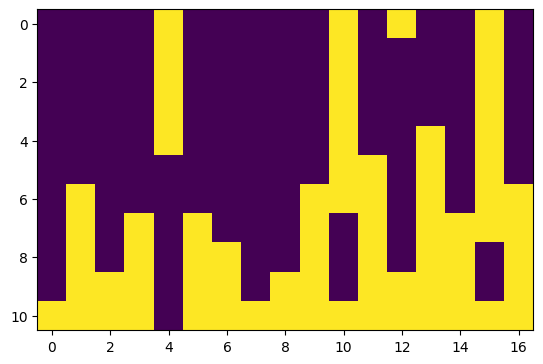

In [6]:
new_rock = make_rock(n_size=np.random.randint(60,100), min_width=11, max_width=11, right_prob=7)
print(new_rock.shape[0]*new_rock.shape[1])
print("density", int(sum(sum(new_rock)))/(new_rock.shape[0]*new_rock.shape[1]))
plt.imshow(new_rock)
plt.show()

We successfully coded a right bias which looks a lot more like layered rock, although we did spin it so that it lays on its side. But this allows us to make more compact rocks and create more continuity within our blocks

#### Making the board

Let's try to generate a ton of these rocks so that they fill up the board. Unfortunately I doubt it would be able to fill up without it looking like a clump or tons of blocks just all over, so let's make a copy of the array for placing blocks. Like a map with collision boxes.

0.0


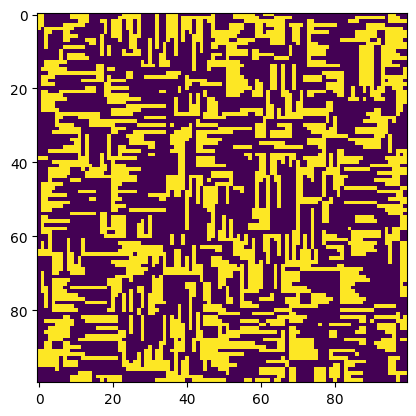

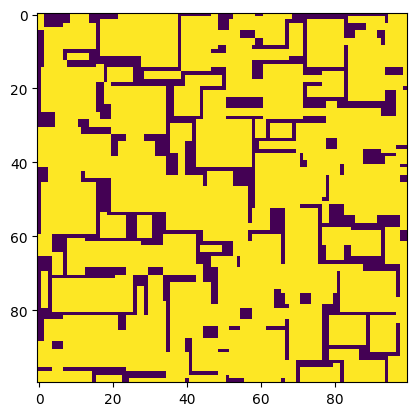

In [7]:
block_N = 100
block_area = np.zeros((block_N,block_N))
block_area_mask = np.copy(block_area)
curr_col = 0
curr_row = 0
print(np.sum(block_area_mask))
complete = 0
p_80 = .8*block_N*block_N
attempts = 0

while complete < p_80: # while the area isnt completely full up to 80%
    n_size = np.random.randint(60,100)
    min_width = 10
    max_width = 15

    if attempts > 75:
        n_size = np.random.randint(10,40)
        min_width = 2
        max_width = 10

    attempts +=1
    new_block = make_rock(n_size=n_size, min_width=min_width, max_width=max_width)
    #plt.imshow(new_block)
    #plt.show()
    for i in range(10):
        ''' Try 10 times'''
        x = np.random.randint(0,block_N)
        y = np.random.randint(0,block_N)
        # orientation
        ori = np.random.randint(0,4)
        new_block = np.rot90(new_block, k=ori)
        new_block_x, new_block_y = new_block.shape
        # Edge cases
        # Remove overhang
        if new_block_x + x > block_N:
            new_block_x = block_N - x
        # Remove overhang
        if new_block_y + y > block_N:
            new_block_y = block_N - y

        if not np.any(block_area_mask[x:x+new_block_x,y:y+new_block_y]):
            block_area_mask[x,y] = 2
            block_area_mask[x:x+new_block_x, y:y+new_block_y] = 1
            #print("x,x+new_block_x,y,y+new_block_y",x,x+new_block_x,y,y+new_block_y, "or", x-x+new_block_x,y-y+new_block_y)
            #print("new_block_x,new_block_y",new_block_x,new_block_y)

            block_area[x:x+new_block_x, y:y+new_block_y] = new_block[0:new_block_x, 0:new_block_y]
            #print(f"block placed at {x} and {y}")
            # plt.imshow(block_area_mask)
            # plt.title("after")
            # plt.show()
            # plt.imshow(block_area)
            # plt.title("after")
            # plt.show()
            complete += new_block_x*new_block_y
            break
        # 
        i+=1
plt.imshow(block_area)
plt.show()
plt.imshow(block_area_mask)
plt.show()

Great let's turn it into a function

In [8]:
def generate_landscape(block_N=100, block_size_min=60, block_size_max=100):
    block_area = np.zeros((block_N,block_N))
    block_area_mask = np.copy(block_area)
    complete = 0
    p_80 = .8*block_N*block_N
    attempts = 0

    while complete < p_80: # while the area isnt completely full up to 80%
        n_size = np.random.randint(block_size_min,block_size_max)
        min_width = 10
        max_width = 15

        if attempts > 75:
            n_size = np.random.randint(10,block_size_min)
            min_width = 2
            max_width = 10

        attempts +=1
        new_block = make_rock(n_size=n_size, min_width=min_width, max_width=max_width)
        for i in range(10):
            ''' Try 10 times'''
            x = np.random.randint(0,block_N)
            y = np.random.randint(0,block_N)
            # orientation
            ori = np.random.randint(0,4)
            new_block = np.rot90(new_block, k=ori)
            new_block_x, new_block_y = new_block.shape
            # Edge cases
            # Remove overhang
            if new_block_x + x > block_N:
                new_block_x = block_N - x
            # Remove overhang
            if new_block_y + y > block_N:
                new_block_y = block_N - y

            if not np.any(block_area_mask[x:x+new_block_x,y:y+new_block_y]):
                block_area_mask[x,y] = 2
                block_area_mask[x:x+new_block_x, y:y+new_block_y] = 1
                block_area[x:x+new_block_x, y:y+new_block_y] = new_block[0:new_block_x, 0:new_block_y]
                complete += new_block_x*new_block_y
                break
            # 
            i+=1
    return block_area, block_area_mask
        

In [9]:
test_map, test_map_mask = generate_landscape(block_N=300,block_size_min=30,block_size_max=50)

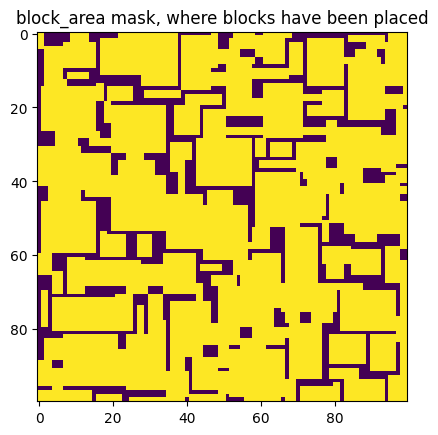

The density of this structure is 0.4079


In [10]:
plt.imshow(block_area)
plt.title("Block area with texture")
plt.show()
plt.imshow(block_area_mask)
plt.title("block_area mask, where blocks have been placed")
plt.show()
print(f"The density of this structure is {np.sum(np.sum(block_area))/(block_N*block_N)}")

You can even make massive structures:

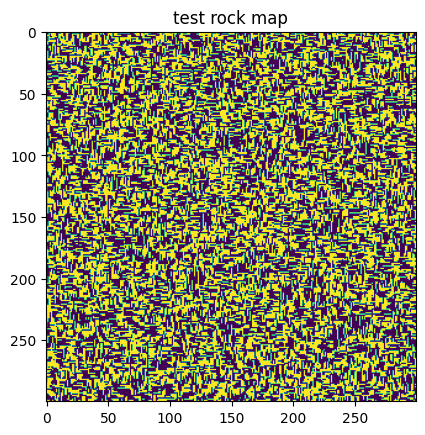

In [11]:
test_map, test_map_mask = generate_landscape(block_N=300,block_size_min=30,block_size_max=50)
plt.imshow(test_map)
plt.title("test rock map")
plt.show()

plt.imshow(test_map_mask)
plt.title("test rock map mask")
plt.show()

### Creating the Microbes

#### Design Considerations

Originally I wanted to add a whole lot to the microbes and make them a class, like a whole game. I figured this would not be feasible on this short time scale. Thus I decided on the rock paper scissors aspect which would simulate each microbe as a pixel competing for area.

The grid will have the following as legend
- Parent Material:
    1
- Microbes:
    - Rock
        2
    - Paper
        3
    - Scissor
        4

### Random placement of microbes

Let's first generate a random board and place microbes until they are full. (innoculation)

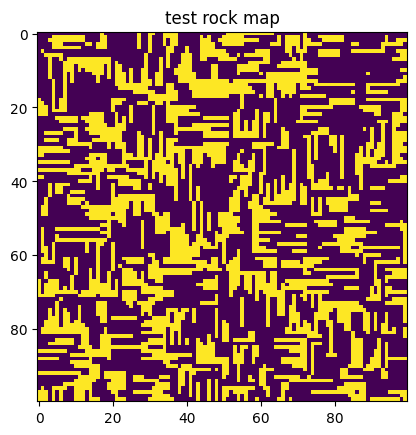

In [12]:
new_test, new_test_mask = generate_landscape(block_N=100)
plt.imshow(new_test)
plt.title("test rock map")
plt.show()

plt.imshow(new_test_mask)
plt.title("test rock map mask")
plt.show()

Without placement logic we have:

In [13]:
new_test_mask = np.copy(new_test)
max_x, max_y = new_test.shape

for i in range(10000):
    x = np.random.randint(max_x)
    y = np.random.randint(max_x)
    if new_test[x,y] == 0:
        microbe = np.random.randint(2,5) # 2, 3, 4
        new_test[x,y] = microbe
plt.imshow(new_test)
plt.title("test rock map")
plt.show()

Lets add some placement logic to increase the amount actually placed

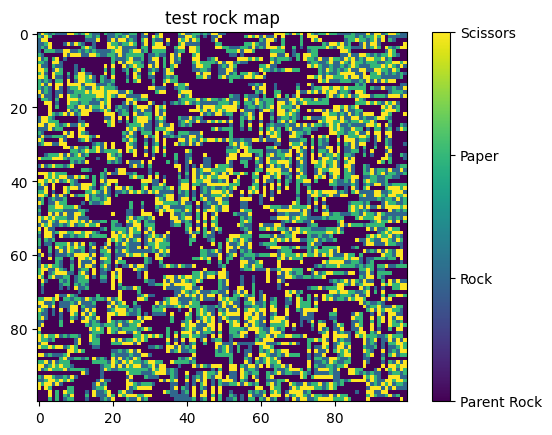

In [14]:
new_test_mask = np.copy(new_test)
max_x, max_y = new_test.shape

for i in range(10000):
    

    # let's evaluate the family of the microbe here:
    microbe = np.random.randint(2,5) # 2, 3, 4
    # now we can add basic logic for placement
    placed = False
    attempts = 0
    while not placed and attempts < 20:
        x = np.random.randint(max_x)
        y = np.random.randint(max_x)
        if new_test[x,y] == 0:
            new_test[x,y] = microbe
            placed = True
            break
        # elif new_test[x,y] != microbe and new_test[x,y] != 1:
        #     if new_test[x,y] == 
        attempts += 1


fig, ax = plt.subplots()
cax = ax.imshow(new_test)
plt.title("test rock map")
cb = fig.colorbar(cax,ticks=[0,1,2,3,4])
cb.ax.set_yticklabels(['Empty', 'Parent Rock', 'Rock', 'Paper', 'Scissors'])
plt.show()

Now lets turn the board prep into a function for ease of use!

In [15]:
def prep_landscape(rand_min=2,rand_max=5):
    new_test, new_test_mask = generate_landscape(block_N=100)
    new_test_mask = np.copy(new_test)
    max_x, max_y = new_test.shape

    for i in range(10000):
        # let's evaluate the family of the microbe here:
        microbe = np.random.randint(rand_min,rand_max) # 2, 3, 4
        # now we can add basic logic for placement
        placed = False
        attempts = 0
        while not placed and attempts < 20:
            x = np.random.randint(max_x)
            y = np.random.randint(max_x)
            if new_test[x,y] == 0:
                new_test[x,y] = microbe
                placed = True
                break
            attempts += 1   
    return new_test, new_test_mask
max_x, max_y = new_test.shape

In [16]:
new_test, new_test_mask = prep_landscape()
new_test_mask = np.copy(new_test)
max_x, max_y = new_test.shape

fig, ax = plt.subplots()
cax = ax.imshow(new_test)
plt.title("test rock map")
cb = fig.colorbar(cax,ticks=[0,1,2,3,4])
cb.ax.set_yticklabels(['Empty', 'Parent Rock', 'Rock', 'Paper', 'Scissors'])
plt.show()

### Movement and Behavior of microbes

Let's program some basic behaviors and see how it all pans out.

To decide whether a microbe stays, reproduces, or dies, we will look around at the neighbors and add up the points: for a simplified view we will decide that:

- same family = 1
- aggressive family = -1
- prey family and parent rock = 0

We add the neighbors points and then if it is negative, we turn that square into 0, if is positive we reproduce to a random open square if available.


In [17]:
def get_point(board, x, y):
    if x < 0 or y < 0 or x >= board.shape[0] or y >= board.shape[1]:
        return 1
    else:
        return board[x,y]
    
def reproduce(old_board, new_board, x, y):
    potential_squares = check_neighbors(old_board, x, y, 0)
    if len(potential_squares) != 0:
        index = np.random.randint(len(potential_squares))
        new_coords = potential_squares[index]
        new_board[new_coords[0], new_coords[1]] = old_board[x,y]
        #print(f"{x} and {y}, reproducing in {new_coords[0], new_coords[1]} the value {new_board[new_coords[0], new_coords[1]],old_board[x,y]} ")
    return new_board

def check_neighbors(board, x,y,val=0):
    potential_squares = []
    if get_point(board,x+1,y) == val:
        potential_squares.append((x+1,y))

    if get_point(board, x-1,y) == val:
        potential_squares.append((x-1,y))

    if get_point(board, x,y+1) == val:
        potential_squares.append((x,y+1))

    if get_point(board, x,y-1) == val:
        potential_squares.append((x,y-1))

    if get_point(board, x+1,y+1) == val:
        potential_squares.append((x+1,y+1))

    if get_point(board, x-1,y-1) == val:
        potential_squares.append((x-1,y-1))

    if get_point(board, x-1,y+1) == val:
        potential_squares.append((x-1,y+1))

    if get_point(board, x+1,y-1) == val:
        potential_squares.append((x+1,y-1))
    return potential_squares

def count_neighbor_point(old_board, new_board, x, y):
    total = 0
    family = old_board[x,y]
    
    if family == 1:
        return

    neighbors = []
    neighbors.append(get_point(old_board,x-1,y-1)) # ul
    neighbors.append(get_point(old_board,x,y-1)) # um
    neighbors.append(get_point(old_board,x+1,y-1)) # ur
    neighbors.append(get_point(old_board,x-1,y)) # ml
    neighbors.append(get_point(old_board,x+1,y)) # mr
    neighbors.append(get_point(old_board,x-1,y+1)) # dl
    neighbors.append(get_point(old_board,x,y+1)) # dm
    neighbors.append(get_point(old_board,x+1,y+1)) # dr

    rock = neighbors.count(2)
    paper = neighbors.count(3)
    scissors = neighbors.count(4)

    if family == 2:
        total = rock - paper
    elif family == 3:
        total = paper - scissors
    elif family == 4:
        total = scissors - rock
    
    if total < 0:
        new_board[x,y] = 0
    elif total > 0:
        new_board = reproduce(old_board, new_board, x, y)
    else:
        # combination of both = move
        new_board = reproduce(old_board, new_board, x, y)
        new_board[x,y] = 0

To capture any videos lets add this:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

metadata = dict(title='My first animation in 3D', artist='Matplotlib',comment='Wakanda is here now.')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)

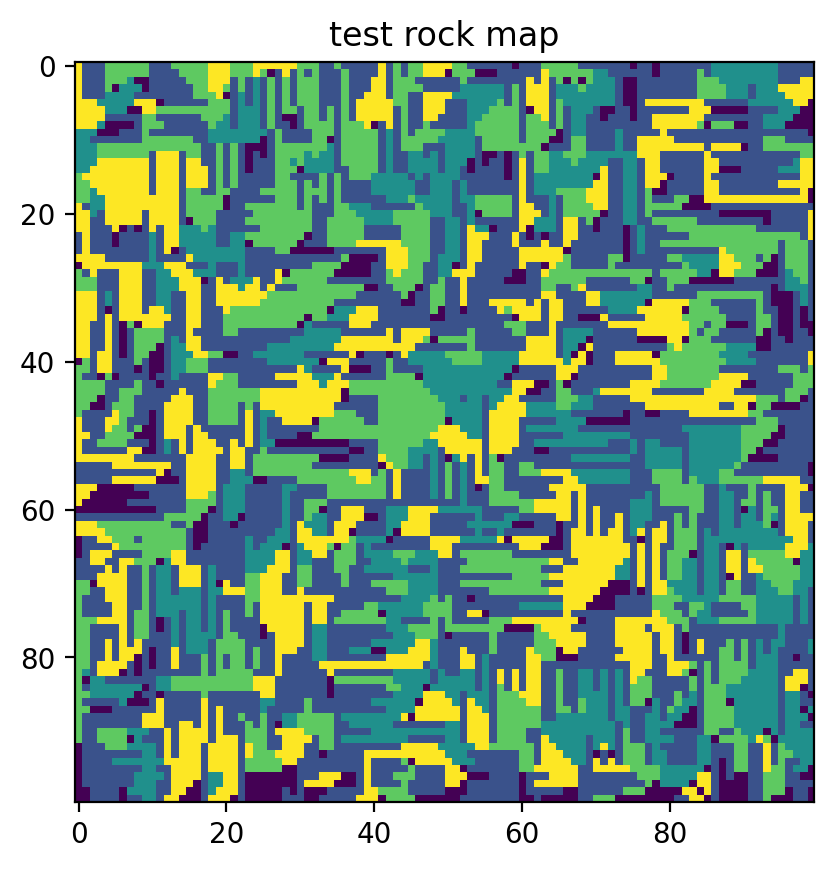

In [19]:
new_test, new_test_mask = prep_landscape()
new_test_mask = np.copy(new_test)
max_x, max_y = new_test.shape
new_test_mask = np.copy(new_test)
#fig, ax = plt.subplots()
#cb = fig.colorbar(cax,ticks=[0,1,2,3,4])
#cb.ax.set_yticklabels(['Empty', 'Parent Rock', 'Rock', 'Paper', 'Scissors'])

fig = plt.figure(dpi=200)

with writer.saving(fig, "animation_1.mp4", dpi=200):
    for i in range(50):
        new_test = np.copy(new_test_mask)
        for x in range(max_x):
            for y in range(max_y):
                count_neighbor_point(new_test_mask, new_test, x, y) 
        new_test_mask = np.copy(new_test)
        plt.imshow(new_test)
        plt.title("test rock map")
        
        #plt.show()
        writer.grab_frame()

Let's add in a way to count how many of each families there are.

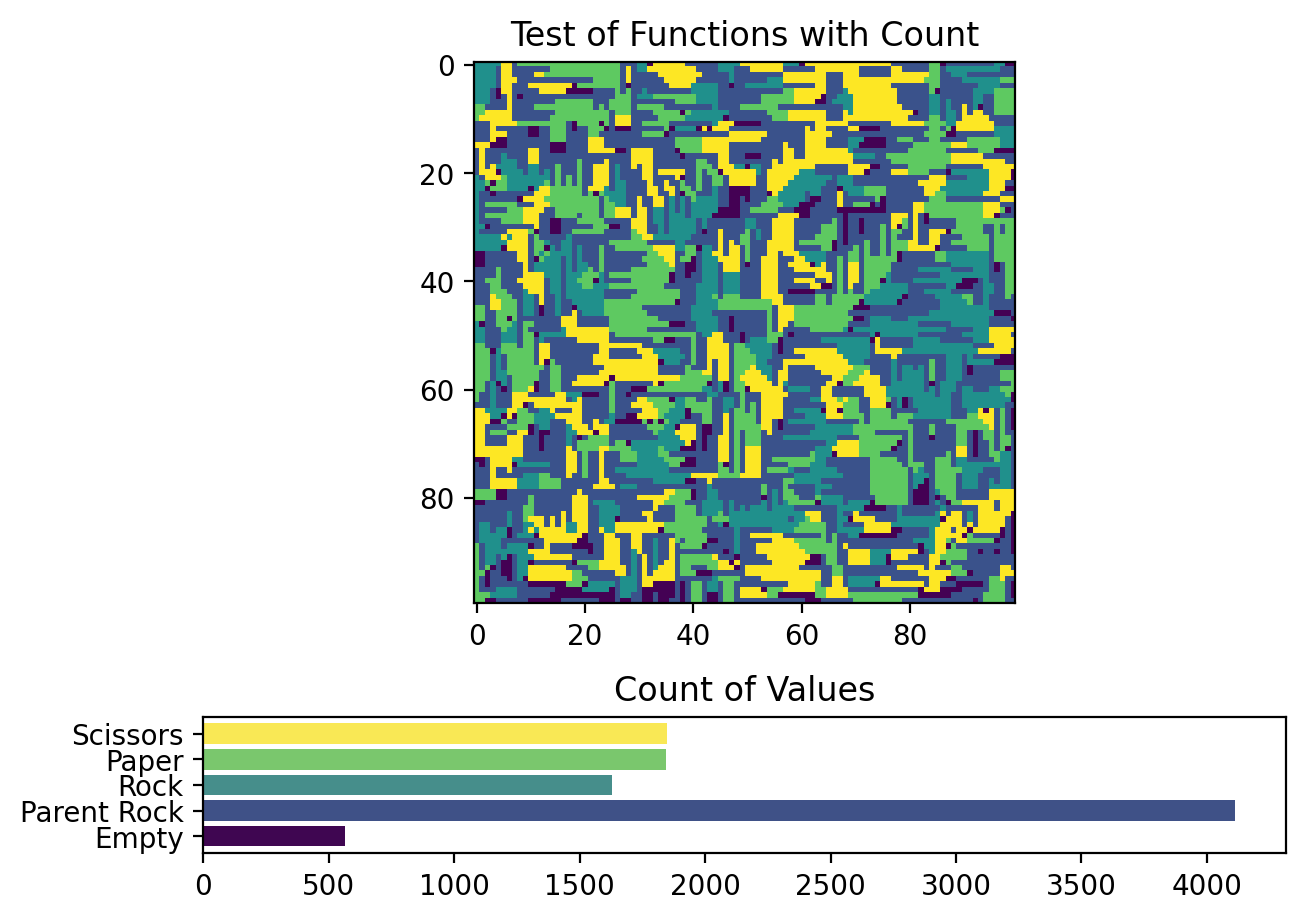

In [20]:
new_test, new_test_mask = prep_landscape()
new_test_mask = np.copy(new_test)
max_x, max_y = new_test.shape
new_test_mask = np.copy(new_test)

# Set up the plot
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, dpi=200)
fig.tight_layout(pad=2.0)

# Initialize the bar plot
new_test[0,0] = 0
num_arr, count_arr = np.unique(new_test, return_counts=True)
color = [(0.247, 0.0247, 0.317), (0.247, 0.317, 0.529), (0.274, 0.556, 0.545), (0.478, 0.780, 0.427), (0.975, 0.909, 0.333)]
bars = ax2.barh(num_arr, count_arr, color=color)
ax2.set_title("Count of Values")
ax2.set_yticks(np.arange(5))
ax2.set_yticklabels(['Empty', 'Parent Rock', 'Rock', 'Paper', 'Scissors'])

with writer.saving(fig, "animation_2.mp4", dpi=200):
    for i in range(50):
        new_test = np.copy(new_test_mask)
        for x in range(max_x):
            for y in range(max_y):
                count_neighbor_point(new_test_mask, new_test, x, y) 
        new_test_mask = np.copy(new_test)
        # plt.imshow(new_test)
        # plt.title("test of functions with count")

         # Update the image
        im = ax1.imshow(new_test, cmap='viridis')
        ax1.set_title("Test of Functions with Count")

        # Update the bar plot
        num_arr, count_arr = np.unique(new_test, return_counts=True)
        for bar, count in zip(bars, count_arr):
            bar.set_width(count)

        #plt.show()
        writer.grab_frame()

Okay, cool but now all of these microbes behave the exact same. Let's see the difference between some of these microbes. We'll take paper and rock and we will assign k and r strategies to them. To do this we will double the chance of death and reproduction for r (rock) and we will halve both for k (paper)

First lets refactor our code so it's more manageable to change

In [21]:
def get_counts(old_board, x, y):
    ''' 
    Returns count of empty, parent rock, rock, paper and scissors
    '''

    neighbors = []
    neighbors.append(get_point(old_board,x-1,y-1)) # ul
    neighbors.append(get_point(old_board,x,y-1)) # um
    neighbors.append(get_point(old_board,x+1,y-1)) # ur
    neighbors.append(get_point(old_board,x-1,y)) # ml
    neighbors.append(get_point(old_board,x+1,y)) # mr
    neighbors.append(get_point(old_board,x-1,y+1)) # dl
    neighbors.append(get_point(old_board,x,y+1)) # dm
    neighbors.append(get_point(old_board,x+1,y+1)) # dr

    empty = neighbors.count(0)
    p_rock = neighbors.count(1)
    rock = neighbors.count(2)
    paper = neighbors.count(3)
    scissors = neighbors.count(4)
    
    return {'empty': empty, 
            'p_rock': p_rock, 
            'rock': rock, 
            'paper': paper, 
            'scissors': scissors}

def eval_total(family, counts, total, old_board, new_board, x, y):
    if total < 0:
        new_board[x,y] = 0
    elif total > 0:
        new_board = reproduce(old_board, new_board, x, y)
    else:
        # combination of both = move
        new_board = reproduce(old_board, new_board, x, y)
        new_board[x,y] = 0

def calc_total(family, counts):
    total = 0
    if family == 2:
        total = counts['rock'] - counts['paper']
    elif family == 3:
        total = counts['paper'] - counts['scissors']
    elif family == 4:
        total = counts['scissors'] - counts['rock']

    return total

def count_neighbor_point(old_board, new_board, x, y):
    family = old_board[x,y]

    if family == 1:
        return
    counts = get_counts(old_board, x, y)
    total = calc_total(family, counts)
    eval_total(family, counts, total, old_board, new_board, x, y)


In [22]:
def run_simul(title, cycles = 50,rand_min=2,rand_max=5, plot_count = False):
    new_test, new_test_mask = prep_landscape(rand_min=rand_min,rand_max=rand_max)
    new_test_mask = np.copy(new_test)
    max_x, max_y = new_test.shape
    new_test_mask = np.copy(new_test)
    counter = []
    labels = ['Empty', 'Parent Rock', 'Rock', 'Paper', 'Scissors']

    # Set up the plot
    if plot_count:
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [4, 1, 1]}, dpi=200)
    else:
        fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, dpi=200)

    fig.tight_layout(pad=2.0)

    # Initialize the bar plot
    new_test[0,0] = 0
    num_arr, count_arr = np.unique(new_test, return_counts=True)
    color = [(0.247, 0.0247, 0.317), (0.247, 0.317, 0.529), (0.274, 0.556, 0.545), (0.478, 0.780, 0.427), (0.975, 0.909, 0.333)]
    bars = ax2.barh(num_arr, count_arr, color=color)
    ax2.set_title("Count of Values")
    ax2.set_yticks(np.arange(5))
    ax2.set_yticklabels(labels)

    with writer.saving(fig, "animation"+title+".mp4", dpi=200):
        for i in range(cycles):
            new_test = np.copy(new_test_mask)
            for x in range(max_x):
                for y in range(max_y):
                    count_neighbor_point(new_test_mask, new_test, x, y) 
            new_test_mask = np.copy(new_test)
            # plt.imshow(new_test)
            # plt.title("test of functions with count")

            # Update the image
            im = ax1.imshow(new_test, cmap='viridis')
            ax1.set_title(title)

            # Update the bar plot
            num_arr, count_arr = np.unique(new_test, return_counts=True)
            for bar, count in zip(bars, count_arr):
                bar.set_width(count)
                
            if plot_count:
                counter.append(count_arr)

            #plt.show()
            writer.grab_frame()
            if i%50 == 0:
                print(i)
            if plot_count:
                ax3.clear()
                for unit in range(2,len(counter[0])):
                    y_axis = [counter[m][unit] for m in range(len(counter))]
                    ax3.plot(np.arange(i+1), y_axis, label=labels[unit], mfc=color[unit])
                ax3.legend()
                
        writer.grab_frame()

0


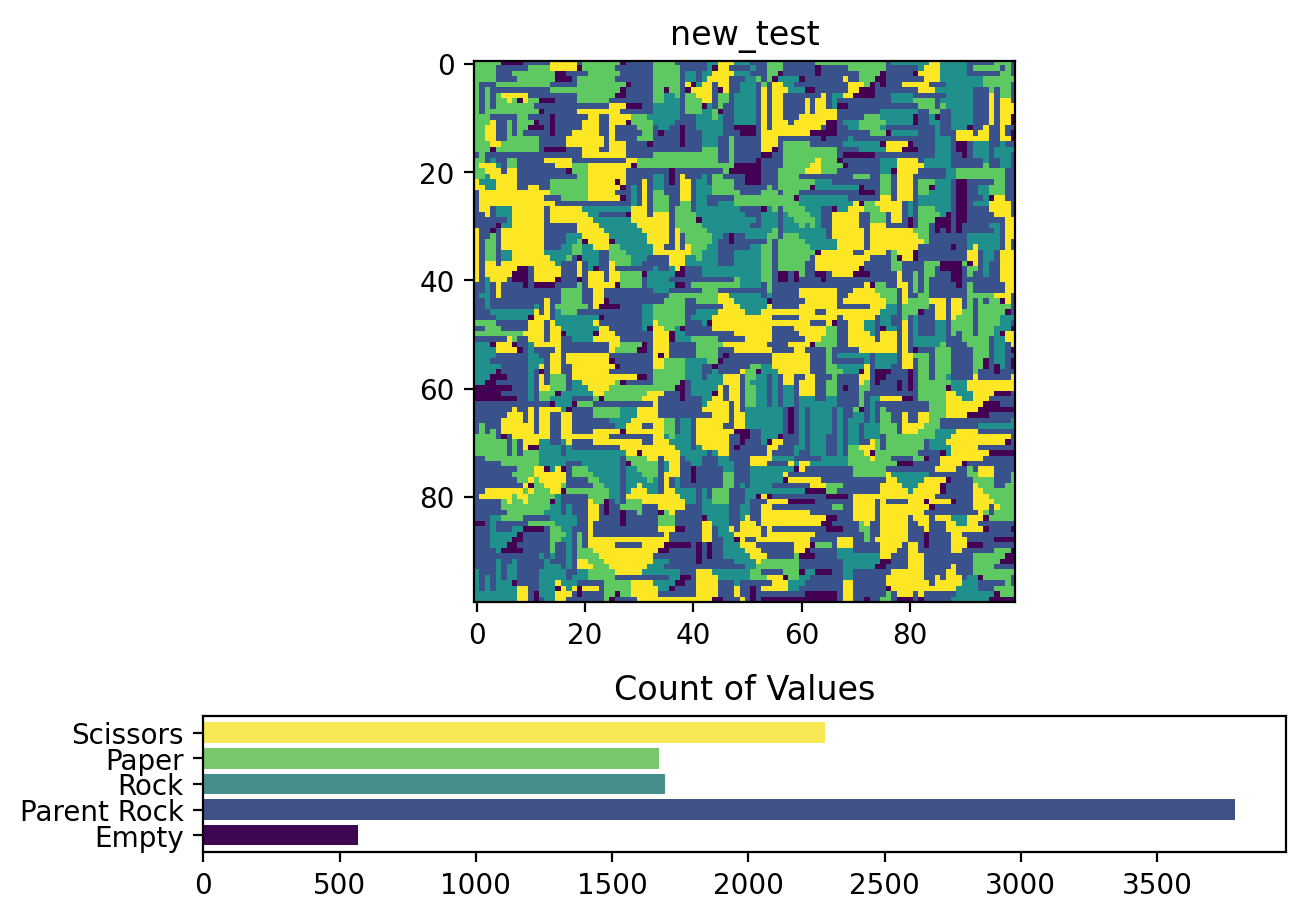

In [23]:
run_simul("new_test")

Nice, now we can change whatever function we need to then run run_simul to get an mp4

### Premature Death

Microbes die, but here they stay alive for a little too long. Usually microbes die because of overcrowding, viruses, lack of access to food sources. To simulate this we will include a death if there are no empty spaces around

Let's have some death triggered by suffocation, if there is no empty space around we will have a 20% chance of killing that microbe

In [24]:
def eval_total(family, counts, total, old_board, new_board, x, y):
    
    if counts['empty'] == 0:
        #20% chance of death
        if np.random.random() < 0.2:
            new_board[x,y] = 0

    if total < 0:
        new_board[x,y] = 0
    elif total > 0 and new_board[x,y] != 0:
        new_board = reproduce(old_board, new_board, x, y)
    else:
        # combination of both = move
        new_board = reproduce(old_board, new_board, x, y)
        new_board[x,y] = 0

0


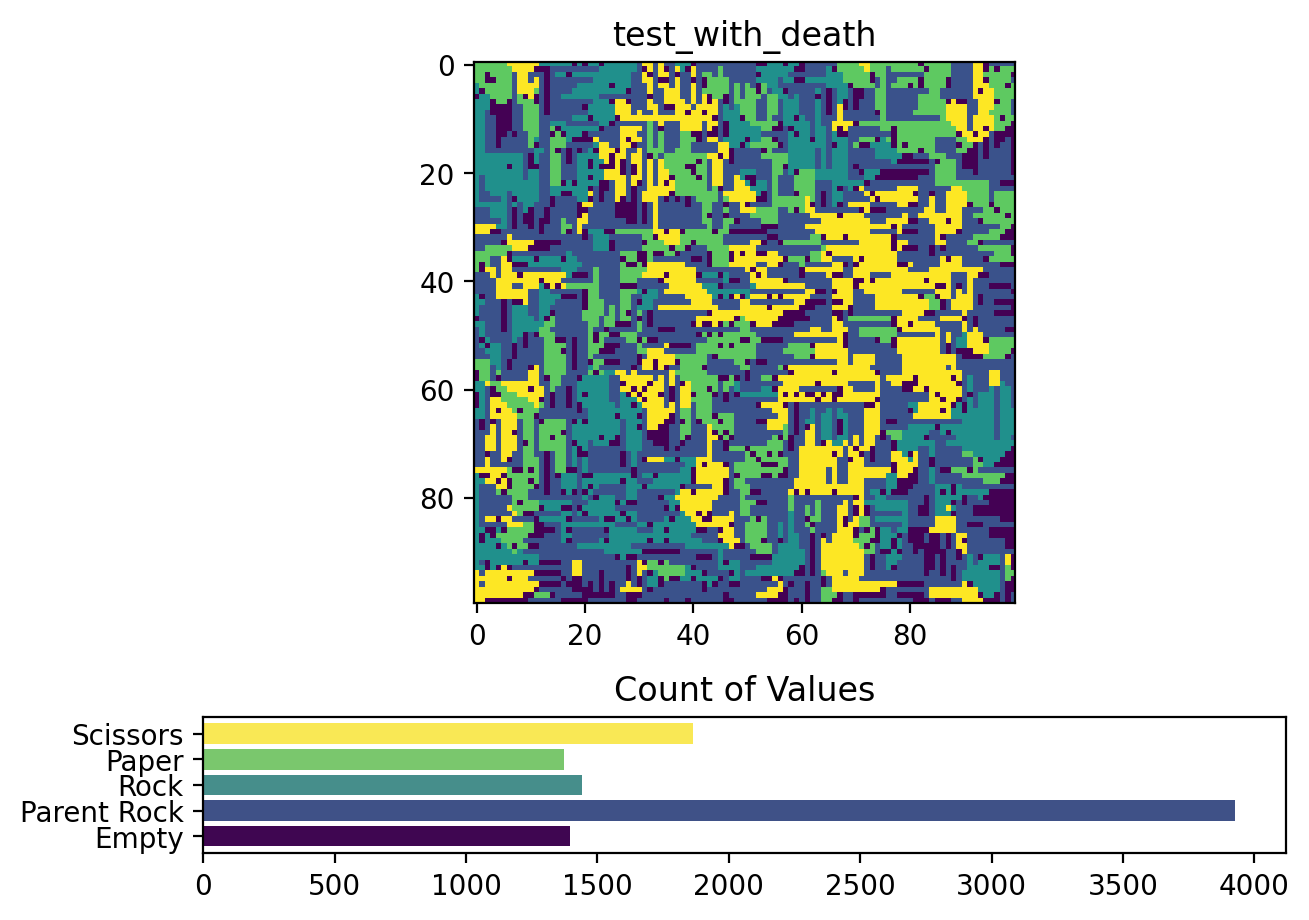

In [25]:
run_simul("test_with_death")

Yay now theres more chance with flux, and theres less _stable_ populations

### R and K strategies

Okay, cool but now all of these microbes behave the exact same. Let's see the difference between some of these microbes. We'll take paper and rock and we will assign k and r strategies to them. To do this we will double the chance of death and reproduction for r (rock) and we will halve both for k (paper)

In [26]:
def eval_total(family, counts, total, old_board, new_board, x, y):
    if counts['empty'] == 0:
        #20% chance of death under suffocation
        if family == 2:
            if np.random.random() < 0.4:
                new_board[x,y] = 0
        elif family == 3:
            if np.random.random() < 0.1:
                new_board[x,y] = 0
        else:
            if np.random.random() < 0.2:
                new_board[x,y] = 0

    if total < 0:
        new_board[x,y] = 0
    elif total > 0 and new_board[x,y] != 0:
        if family == 2:
            for i in range(2):
                new_board = reproduce(old_board, new_board, x, y)
        elif family == 3:
            if np.random.random() <= 0.5:
                new_board = reproduce(old_board, new_board, x, y)
        else:
            new_board = reproduce(old_board, new_board, x, y)
    else:
        # combination of both = move
        new_board = reproduce(old_board, new_board, x, y)
        new_board[x,y] = 0

0


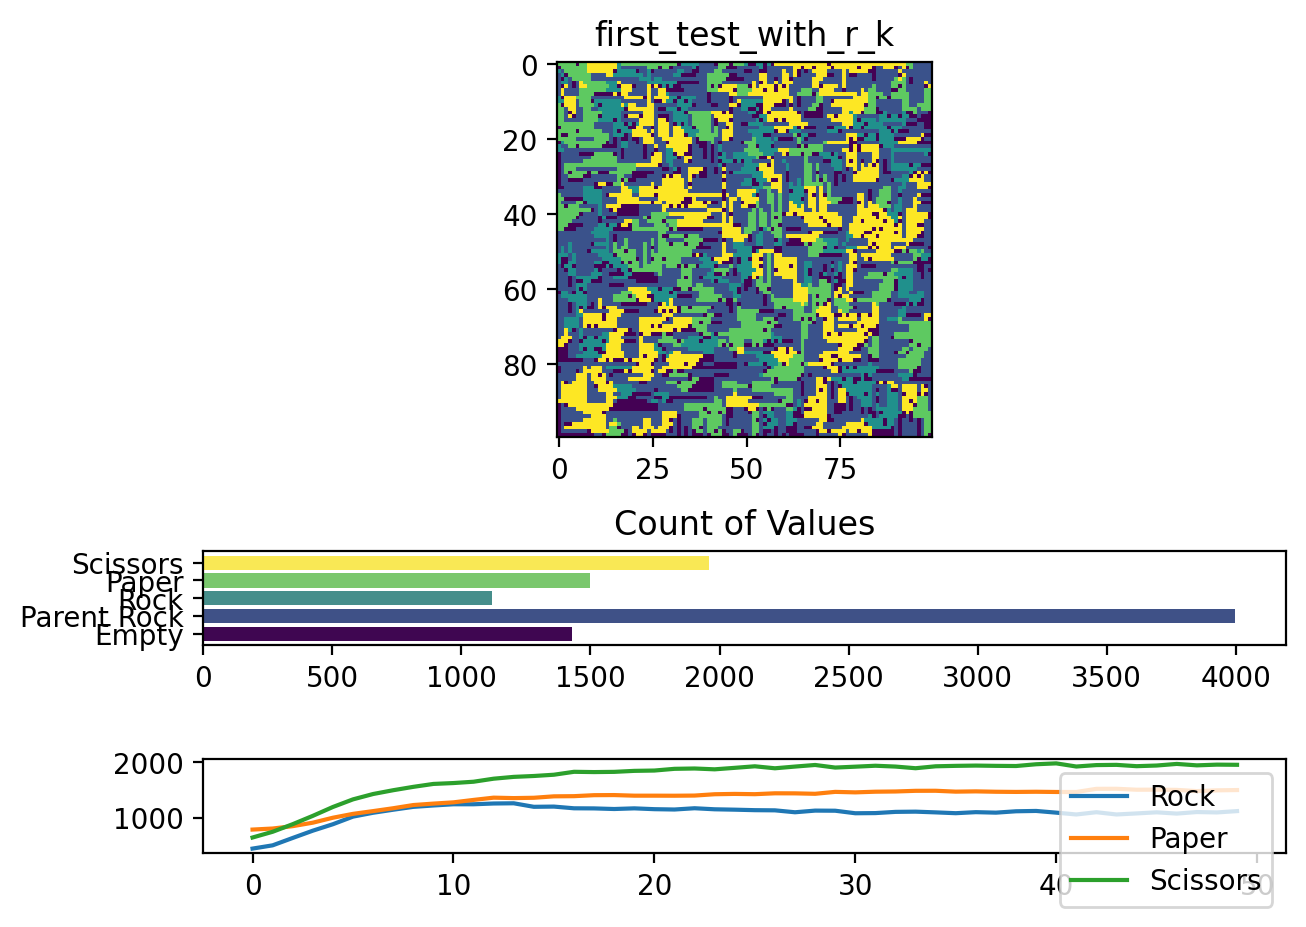

In [27]:
run_simul("first_test_with_r_k", cycles = 50, plot_count=True)

We should be seeing something akin to the following for the growth rate

![R and K strategy](image.png)

hmm scissors seems to be winning out, probably because it benefits from less rock, which drives paper down. Let's set it up so we only have two 

0


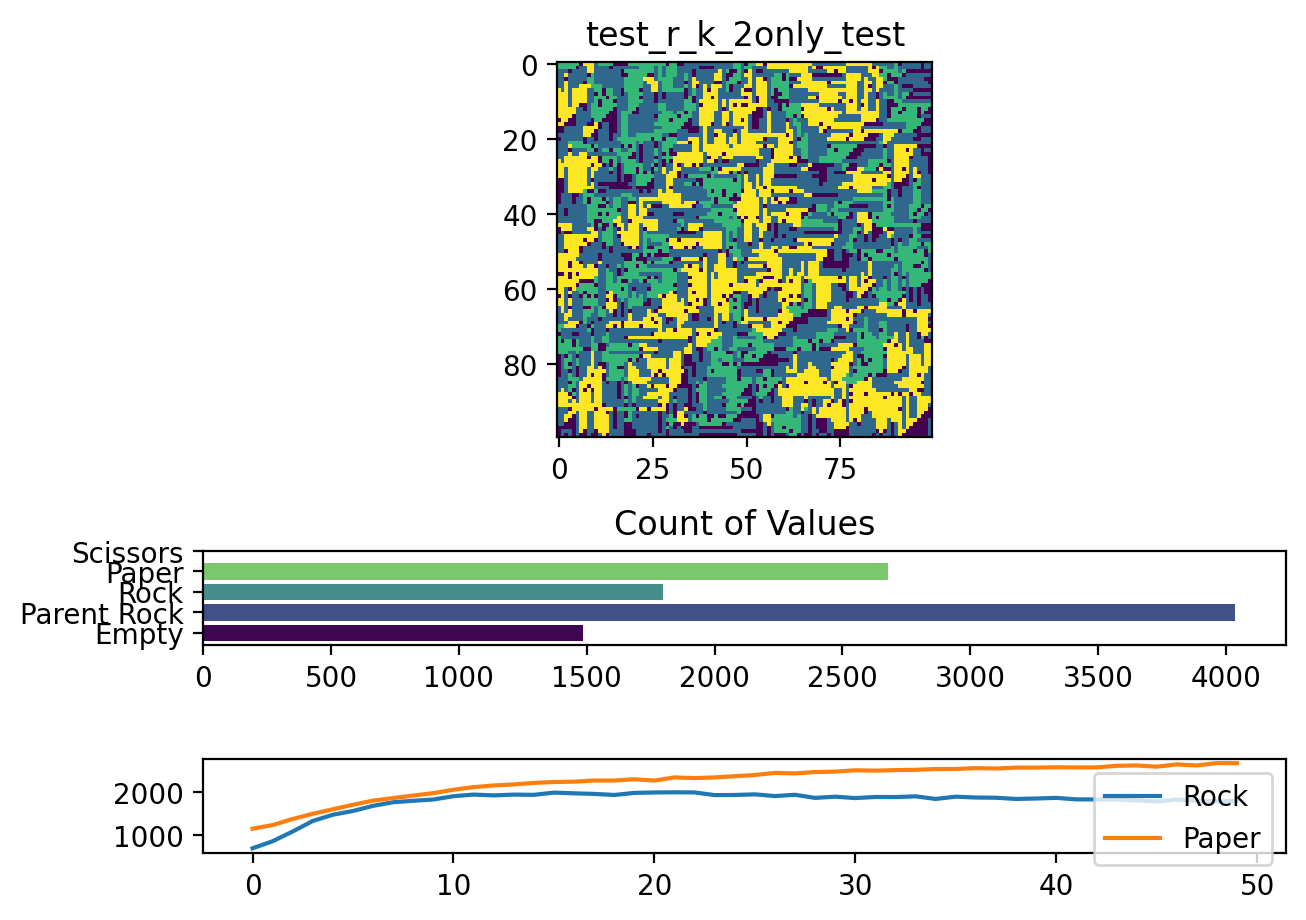

In [28]:
def calc_total(family, counts):
    total = 0
    if family == 2:
        total = counts['rock'] - counts['paper']
    elif family == 3:
        total = counts['paper'] - counts['rock']
    return total

run_simul("test_r_k_2only_test",rand_max=4,cycles=50,plot_count=True)

What we see is just like the photo, the k strategist (paper) has slow growth throughout and early on whereas the r strategist (rock) has quick growth in the beginning but then slows down later.

Okay now to return it back to normal, we'll keep r and k strategies

In [29]:
def calc_total(family, counts):
    total = 0
    if family == 2:
        total = counts['rock'] - counts['paper']
    elif family == 3:
        total = counts['paper'] - counts['scissors']
    elif family == 4:
        total = counts['scissors'] - counts['rock']

    return total

Let's increase movement and see what that does

In [40]:
def eval_total(family, counts, total, old_board, new_board, x, y):
    if counts['empty'] == 0:
        #20% chance of death under suffocation
        if family == 2:
            if np.random.random() < 0.4:
                new_board[x,y] = 0
        elif family == 3:
            if np.random.random() < 0.1:
                new_board[x,y] = 0
        else:
            if np.random.random() < 0.2:
                new_board[x,y] = 0

    if np.random.random() > 2:
        new_board = reproduce(old_board, new_board, x, y)
        new_board[x,y] = 0
    elif total < 0:
        new_board[x,y] = 0
    elif total > 0 and new_board[x,y] != 0:
        if family == 2:
            for i in range(2):
                new_board = reproduce(old_board, new_board, x, y)
        elif family == 3:
            if np.random.random() <= 0.5:
                new_board = reproduce(old_board, new_board, x, y)
        else:
            new_board = reproduce(old_board, new_board, x, y)
    else:
        # combination of both = move
        new_board = reproduce(old_board, new_board, x, y)
        new_board[x,y] = 0

0


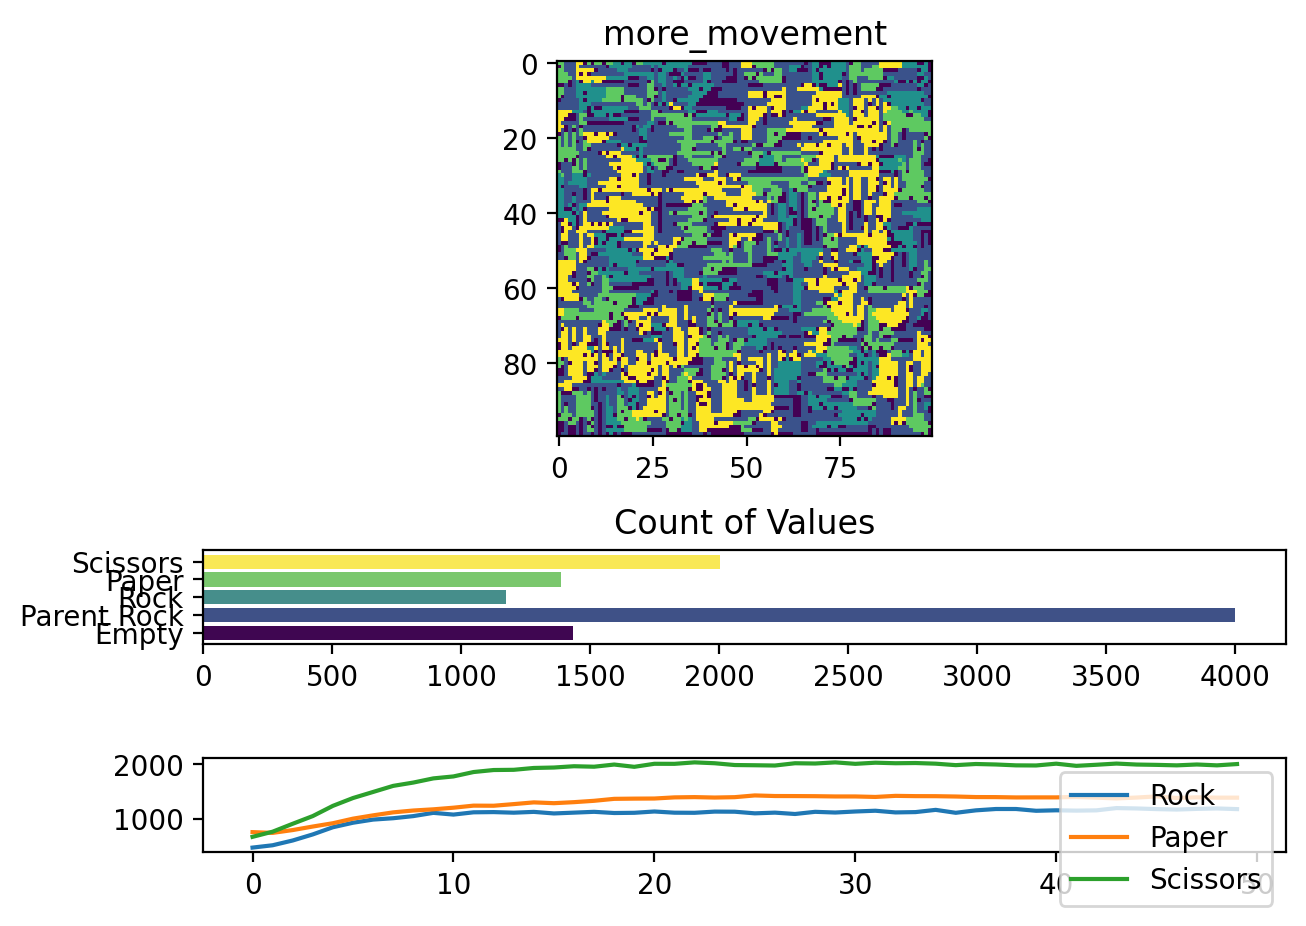

In [41]:
run_simul("more_movement", cycles = 50, plot_count=True)

### Wall bonus

In life, having a wall or a place to attach to usually increases your ability to stay alive, so let's add that in, and in this case, let's treat it as a tradeoff. For R and K strategists, having a wall around should reduce the chance of death, for Scissors, we'll say in return it's free living.

In [44]:
def eval_total(family, counts, total, old_board, new_board, x, y):
    if counts['empty'] == 0:
        #20% chance of death under suffocation
        if family == 2 or family == 3:
            # 50% survival if next to a p_rock
            if counts['p_rock'] == 0 and np.random.random() < 0.5:
                if family == 2:
                    if np.random.random() < 0.4:
                        new_board[x,y] = 0
                elif family == 3:
                    if np.random.random() < 0.1:
                        new_board[x,y] = 0
        else:
            if np.random.random() < 0.2:
                new_board[x,y] = 0

    if np.random.random() > 2:
        new_board = reproduce(old_board, new_board, x, y)
        new_board[x,y] = 0
    elif total < 0:
        new_board[x,y] = 0
    elif total > 0 and new_board[x,y] != 0:
        if family == 2:
            for i in range(2):
                new_board = reproduce(old_board, new_board, x, y)
        elif family == 3:
            if np.random.random() <= 0.5:
                new_board = reproduce(old_board, new_board, x, y)
        else:
            new_board = reproduce(old_board, new_board, x, y)
    else:
        # combination of both = move
        new_board = reproduce(old_board, new_board, x, y)
        new_board[x,y] = 0

0


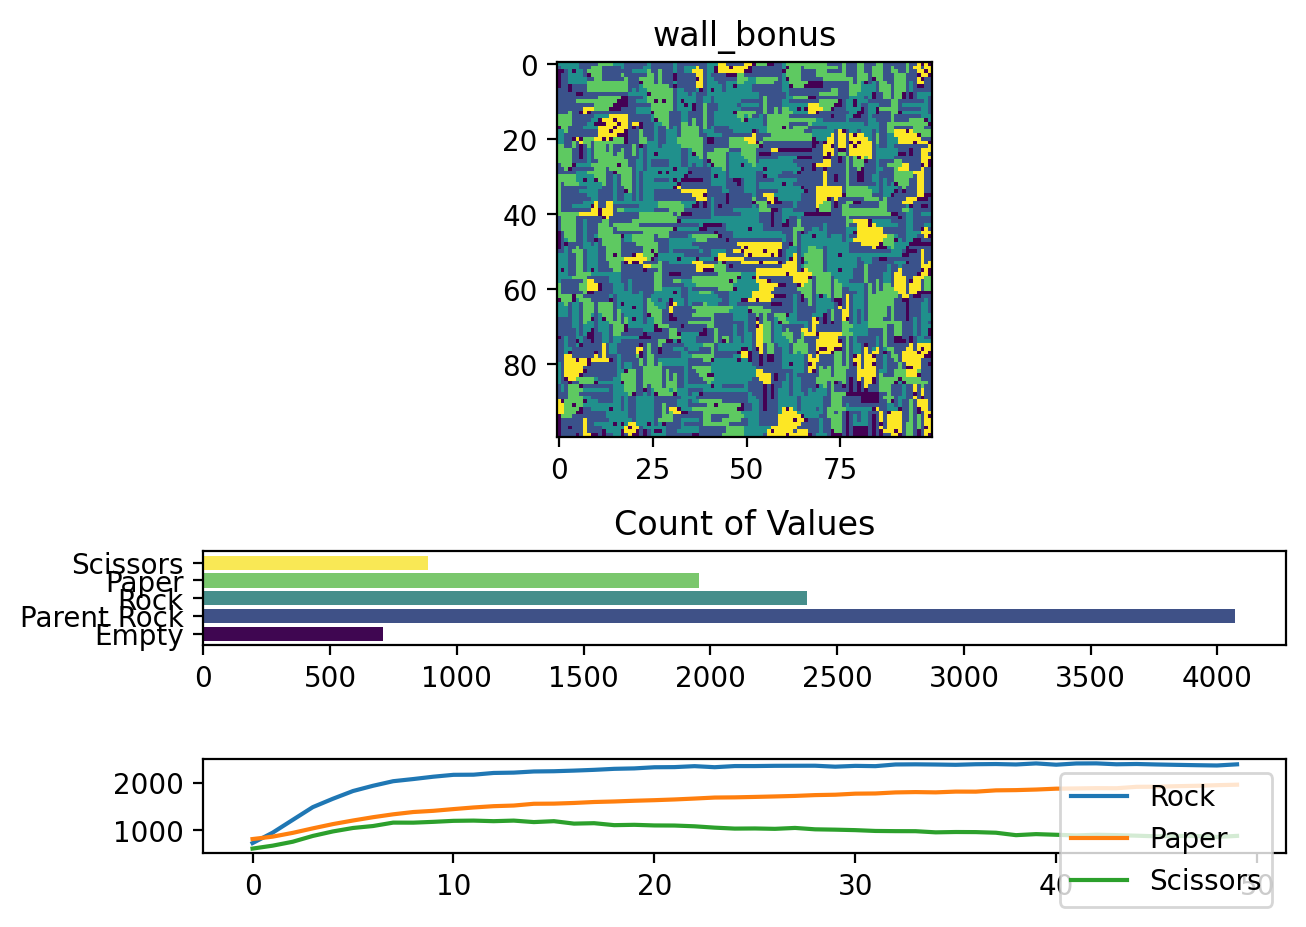

In [45]:
run_simul("wall_bonus", cycles = 50, plot_count=True)

Rock seems to really benefit from the wall bonus, much moreso than paper. We see again the R and K strategy in action. Paper (K strat) with slow growth but steady growth and R with it's explosive growth. It is no accident that Paper should be able to prey on Rock, as many K strategists prey on R strategists. let's run one for longer

0
50
100


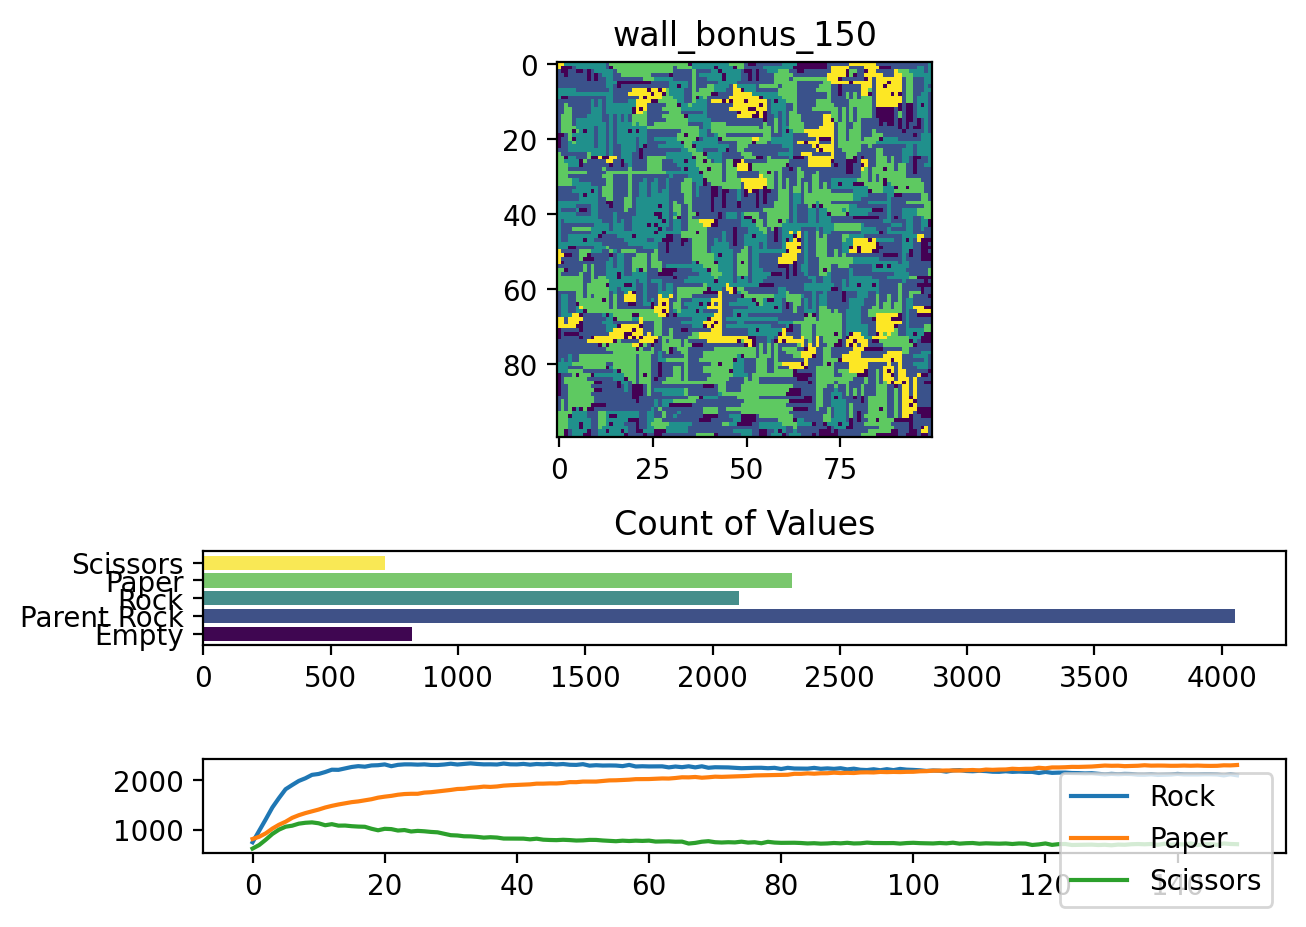

In [46]:
run_simul("wall_bonus_150", cycles = 150, plot_count=True)


YEP! WE DID THAT! K strategists found its way to overtake the R strategist, and this performs very much like other ecological systems